In [48]:
import pickle, os
import pymongo as pm
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pickle
import json
import os
%matplotlib inline

In [58]:
dbName = '13May16' #replace this with most recent db created from running pickleFNL.py
subPath = os.path.join('../Data/',dbName,'subjects.p')
userPath = os.path.join('../Data/',dbName,'users.p')
Subjects = pickle.load(open('../Data/13May16/subjects.p','rb'))
Users = pickle.load(open('../Data/13May16/users.p','rb'))

#Test user accounts to ignore
testUsers = ['ejolly@test.com','test@test.com','aratidoo@gmail.com','anna.t.prescott.gr@dartmouth.edu']
userIds = {}
for user in Users:
    email = user['emails'][0]['address']
    if email not in testUsers:
        meteorID = user['_id']
        userIds[email] = meteorID

#Filter out test users from actual data
for i, sub in enumerate(Subjects):
    if sub['_id'] not in userIds.values():
        Subjects.pop(i)
Subjects = pd.DataFrame(Subjects)

In [52]:
#Define some helper functions, one to get the data for a particular question type and the other to plot, and then one to call both
def getDim(dim,subs = Subjects):
    out = []
    for i,s in subs.iterrows():
        eData = pd.DataFrame(s['episodeData'])
        dimData = pd.concat([pd.Series(eData.ix[dim,i]) for i in xrange(eData.shape[1])],axis=1)
        out.append(dimData)
    return out 

def plotDim(data,key):    
    fig,axes = plt.subplots(len(data),1,figsize = (20,20));
    #Find out who's watched farthest for adjusting the plots
    maxEp = max([elem.shape[1] for elem in data])

    for i, sub in enumerate(data):
        ax = sub.T.plot(ax=axes[i],legend=False)
        ax.set_xticks(xrange(maxEp));
        ax.set_xticklabels(['ep'+ str(i) for i in xrange(1,maxEp+1)],fontsize=14);
    #Axes for just 1
    axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
              ncol=5, fontsize= 14)
    plt.suptitle('Dimension: ' + key, fontsize=25);

def plotEpisodeData(dimension):
    data = getDim(dimension)
    plotDim(data,dimension)

In [59]:
#Here are the different questions we asked
keys = pd.DataFrame(Subjects.ix[0,'episodeData']).index.values
print [str(key) for key in keys]

['annoy', 'attractive', 'be', 'care', 'friends', 'like', 'likePair', 'listenPair', 'relate', 'remind', 'trustPair']


In [275]:
subj = 0
data = getDim('likePair')
data = data[subj]

In [283]:
edges =[]
ep = 0
test = data[[ep]]
test.reset_index()
for i in range(156):
    x = test.index.values[i].split('_')
    x[0] = str(x[0])
    x[1] = str(x[1])
    x.append(test[[ep]][0][i])
    if test[[ep]][0][i] > 80:
        edges.append(tuple(x))

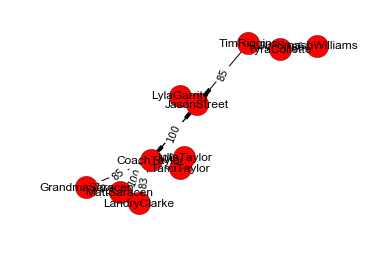

In [289]:
DG=nx.DiGraph()
DG.add_weighted_edges_from(edges)

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in DG.edges(data=True)])

pos = nx.spring_layout(DG)
nx.draw_networkx_edge_labels(DG,pos,edge_labels=edge_labels)
nx.draw(DG,pos,node_size=500,with_labels=True)

In [290]:
DG.successors('JasonStreet')

['CoachTaylor', 'LylaGarrity']